In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
# import the results of the first post-process step
nfl_df = pd.read_csv(filepath_or_buffer='2_nfl_contracts_pre_process.csv',\
            header=0, index_col=0, dtype={'position': 'category', 'team': 'category', 'roster_status': 'category'})

In [3]:
#TODO: Map positions into offense/defense and then sub-groups -> skill_position, o_line, QB; dline, LB, secondary 
nfl_df.sample(5)

,base_salary,bonus_total,name,position,roster_status,team,total_money,year
index,,,,,,,,
28619,2000000,2000000,Jared Cook,TE,active,new-orleans-saints,4000000,2019
34625,420000,126504,Dri Archer,RB,active,pittsburgh-steelers,546504,2014
41517,775000,0,Phil Taylor,DT,injured_reserve,washington-redskins,775000,2017
6077,510000,134950,Trai Turner,G,active,carolina-panthers,644950,2015
6643,820000,390000,Chris Manhertz,TE,active,carolina-panthers,1210000,2020


In [4]:
nfl_df['position'].value_counts()

WR     5299
CB     4315
DE     3152
RB     3066
DT     2903
G      2735
TE     2719
OLB    2704
ILB    1946
QB     1915
S      1563
C      1344
T      1215
LB     1039
RT     1003
SS      900
FS      891
LT      803
K       680
FB      613
P       571
LS      506
KR       14
PR        1
Name: position, dtype: int64

In [3]:
position_dict = {'WR':'offense', 'CB': 'defense', 'DE': 'defense', 'RB': 'offense', 'DT': 'defense', 'G': 'offense',
                 'TE':'offense', 'OLB': 'defense', 'ILB': 'defense', 'QB': 'offense', 'S': 'defense', 'C': 'offense',
                 'T': 'offense', 'LB': 'defense', 'RT': 'offense', 'SS': 'defense', 'FS': 'defense', 'LT': 'offense', 
                 'K': 'specialty', 'FB': 'offense', 'P': 'specialty', 'LS': 'specialty', 'KR': 'specialty', 'PR': 'specialty'}



In [4]:
position_dict

{'WR': 'offense',
 'CB': 'defense',
 'DE': 'defense',
 'RB': 'offense',
 'DT': 'defense',
 'G': 'offense',
 'TE': 'offense',
 'OLB': 'defense',
 'ILB': 'defense',
 'QB': 'offense',
 'S': 'defense',
 'C': 'offense',
 'T': 'offense',
 'LB': 'defense',
 'RT': 'offense',
 'SS': 'defense',
 'FS': 'defense',
 'LT': 'offense',
 'K': 'specialty',
 'FB': 'offense',
 'P': 'specialty',
 'LS': 'specialty',
 'KR': 'specialty',
 'PR': 'specialty'}

In [5]:
nfl_df['pos_group'] = nfl_df.position.map(position_dict)



In [8]:
nfl_df

,base_salary,bonus_total,name,position,roster_status,team,total_money,year,pos_group
index,,,,,,,,,
0,5250000,1750000,Edgerrin James,RB,active,arizona-cardinals,7000000,2007,offense
1,3580000,3262000,Larry Fitzgerald,WR,active,arizona-cardinals,6842000,2007,offense
2,4500000,900000,Chike Okeafor,G,active,arizona-cardinals,5400000,2007,offense
3,4000000,1000000,Kurt Warner,QB,active,arizona-cardinals,5000000,2007,offense
4,510000,3500000,Darnell Dockett,DE,active,arizona-cardinals,4010000,2007,defense
...,...,...,...,...,...,...,...,...,...
41892,0,78096,Adonis Alexander,CB,dead_cap,washington-redskins,78096,2020,defense
41893,0,10667,JoJo McIntosh,S,dead_cap,washington-redskins,10667,2020,defense
41894,0,10000,Bryan Blunt,LB,dead_cap,washington-redskins,10000,2020,defense


In [6]:
sub_position_dict = {'WR':'skill', 'CB': 'secondary', 'DE': 'dline', 'RB': 'rb', 'DT': 'dline', 'G': 'oline',
                 'TE':'skill', 'OLB': 'lb', 'ILB': 'lb', 'QB': 'qb', 'S': 'secondary', 'C': 'oline',
                 'T': 'oline', 'LB': 'lb', 'RT': 'oline', 'SS': 'secondary', 'FS': 'secondary', 'LT': 'oline', 
                 'K': 'specialty', 'FB': 'rb', 'P': 'specialty', 'LS': 'specialty', 'KR': 'specialty', 'PR': 'specialty'}

nfl_df['pos_subgroup'] = nfl_df.position.map(sub_position_dict)

In [7]:
nfl_df[['position', 'pos_group', 'pos_subgroup']].sample(5)

,position,pos_group,pos_subgroup
index,,,
22604,LS,specialty,specialty
34848,DT,defense,dline
33370,FS,defense,secondary
26114,RB,offense,rb
12033,DE,defense,dline


In [11]:
nfl_df['team'].value_counts()



new-england-patriots    1437
jacksonville-jaguars    1401
buffalo-bills           1399
miami-dolphins          1392
indianapolis-colts      1370
arizona-cardinals       1360
san-francisco-49ers     1356
washington-redskins     1351
atlanta-falcons         1337
philadelphia-eagles     1336
baltimore-ravens        1330
dallas-cowboys          1328
new-york-giants         1328
new-york-jets           1326
houston-texans          1325
seattle-seahawks        1324
detroit-lions           1318
cleveland-browns        1303
tampa-bay-buccaneers    1290
los-angeles-chargers    1288
pittsburgh-steelers     1288
denver-broncos          1283
new-orleans-saints      1274
green-bay-packers       1271
chicago-bears           1267
tennessee-titans        1265
carolina-panthers       1257
oakland-raiders         1247
kansas-city-chiefs      1227
minnesota-vikings       1221
cincinnati-bengals      1210
los-angeles-rams        1188
Name: team, dtype: int64

In [62]:
# read-in nfl standings from 2019 year
nfl_wl_df = pd.read_csv('nfl_standings.csv', header=0, usecols=[0, 1, 2, 3, 4])


In [64]:
nfl_wl_df['team'].unique()

array(['arizona-cardinals', 'atlanta-falcons', 'baltimore-ravens',
       'buffalo-bills', 'carolina-panthers', 'chicago-bears',
       'cincinnati-bengals', 'cleveland-browns', 'dallas-cowboys',
       'denver-broncos', 'detroit-lions', 'green-bay-packers',
       'houston-texans', 'indianapolis-colts', 'jacksonville-jaguars',
       'kansas-city-chiefs', 'los-angeles-chargers', 'los-angeles-rams',
       'miami-dolphins', 'minnesota-vikings', 'new-england-patriots',
       'new-orleans-saints', 'new-york-giants', 'new-york-jets',
       'oakland-raiders', 'philadelphia-eagles', 'pittsburgh-steelers',
       'san-francisco-49ers', 'seattle-seahawks', 'tampa-bay-buccaneers',
       'tennessee-titans', 'washington-redskins'], dtype=object)

In [10]:
nfl_df['team'].unique()


[arizona-cardinals, atlanta-falcons, baltimore-ravens, buffalo-bills, carolina-panthers, ..., san-francisco-49ers, seattle-seahawks, tampa-bay-buccaneers, tennessee-titans, washington-redskins]
Length: 32
Categories (32, object): [arizona-cardinals, atlanta-falcons, baltimore-ravens, buffalo-bills, ..., seattle-seahawks, tampa-bay-buccaneers, tennessee-titans, washington-redskins]

In [26]:
mask = nfl_df['year'] == 2019
nfl_df[mask]

,base_salary,bonus_total,name,position,roster_status,team,total_money,year,pos_group,pos_subgroup
index,,,,,,,,,,
1159,9500000,5333333,Chandler Jones,OLB,active,arizona-cardinals,14833333,2019,defense,lb
1160,11000000,750000,Larry Fitzgerald,WR,active,arizona-cardinals,11750000,2019,offense,skill
1161,5700000,3956250,David Johnson,RB,active,arizona-cardinals,9656250,2019,offense,rb
1162,9625000,0,D.J. Humphries,LT,active,arizona-cardinals,9625000,2019,offense,oline
1163,7117647,884588,Patrick Peterson,CB,active,arizona-cardinals,8002235,2019,defense,secondary
...,...,...,...,...,...,...,...,...,...,...
41823,8000,0,Donald Parham,TE,dead_cap,washington-redskins,8000,2019,offense,skill
41824,8000,0,Jojo Wicker,DE,dead_cap,washington-redskins,8000,2019,defense,dline
41825,8000,0,Darrell Williams,LB,dead_cap,washington-redskins,8000,2019,defense,lb


In [50]:
pd.merge(left=nfl_df[mask], right=nfl_wl_df, on='team', how='inner')#%%

,base_salary,bonus_total,name,position,roster_status,team,total_money,year_x,pos_group,pos_subgroup,year_y,w,l,playoff
0,9500000,5333333,Chandler Jones,OLB,active,arizona-cardinals,14833333,2019,defense,lb,2019,5,10,no
1,11000000,750000,Larry Fitzgerald,WR,active,arizona-cardinals,11750000,2019,offense,skill,2019,5,10,no
2,5700000,3956250,David Johnson,RB,active,arizona-cardinals,9656250,2019,offense,rb,2019,5,10,no
3,9625000,0,D.J. Humphries,LT,active,arizona-cardinals,9625000,2019,offense,oline,2019,5,10,no
4,7117647,884588,Patrick Peterson,CB,active,arizona-cardinals,8002235,2019,defense,secondary,2019,5,10,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3838,8000,0,Donald Parham,TE,dead_cap,washington-redskins,8000,2019,offense,skill,2019,3,13,no
3839,8000,0,Jojo Wicker,DE,dead_cap,washington-redskins,8000,2019,defense,dline,2019,3,13,no
3840,8000,0,Darrell Williams,LB,dead_cap,washington-redskins,8000,2019,defense,lb,2019,3,13,no
3841,0,5333,JoJo McIntosh,S,dead_cap,washington-redskins,5333,2019,defense,secondary,2019,3,13,no


In [43]:
# pd.merge(left=nfl_df[mask], right=nfl_wl_df, on='team', how='inner') ['team'].unique()

array(['arizona-cardinals', 'atlanta-falcons', 'baltimore-ravens',
       'buffalo-bills', 'carolina-panthers', 'chicago-bears',
       'cincinnati-bengals', 'cleveland-browns', 'dallas-cowboys',
       'denver-broncos', 'detroit-lions', 'green-bay-packers',
       'houston-texans', 'indianapolis-colts', 'jacksonville-jaguars',
       'los-angeles-chargers', 'los-angeles-rams', 'miami-dolphins',
       'minnesota-vikings', 'new-england-patriots', 'new-york-giants',
       'new-york-jets', 'oakland-raiders', 'philadelphia-eagles',
       'pittsburgh-steelers', 'seattle-seahawks', 'tampa-bay-buccaneers',
       'tennessee-titans', 'washington-redskins'], dtype=object)

In [51]:
# grouping nfl_df into a frame where a team is an individual row
nfl_df[mask].groupby(['year', 'team'])

In [54]:
nfl_df[mask]['roster_status'].unique()


[active, injured_reserve, non_fb_injury, practice_squad, dead_cap]
Categories (5, object): [active, injured_reserve, non_fb_injury, practice_squad, dead_cap]

In [59]:
nfl_df[mask & nfl_df['roster_status'].isin(['injured_reserve', 'dead_cap'])].groupby(['year', 'team','roster_status'], as_index=False)['total_money'].sum()


,year,team,roster_status,total_money
0,2019,arizona-cardinals,active,NaN
1,2019,arizona-cardinals,dead_cap,50899702.0
2,2019,arizona-cardinals,injured_reserve,22343475.0
3,2019,arizona-cardinals,non_fb_injury,NaN
4,2019,arizona-cardinals,practice_squad,NaN
...,...,...,...,...
155,2019,washington-redskins,active,NaN
156,2019,washington-redskins,dead_cap,13286484.0
157,2019,washington-redskins,injured_reserve,64540405.0
158,2019,washington-redskins,non_fb_injury,NaN


In [63]:
other_mask = nfl_df['roster_status'].isin(['non_fb_injury'])
nfl_df[other_mask].sort_values(by='total_money')

,base_salary,bonus_total,name,position,roster_status,team,total_money,year,pos_group,pos_subgroup
index,,,,,,,,,,
11074,0,1666,Chris Whaley,DT,non_fb_injury,dallas-cowboys,1666,2014,defense,dline
37240,0,25418,Garrett Scott,LT,non_fb_injury,seattle-seahawks,25418,2014,offense,oline
16458,0,28363,David Quessenberry,LT,non_fb_injury,houston-texans,28363,2016,offense,oline
28674,102000,1666,Chase Hansen,LB,non_fb_injury,new-orleans-saints,103666,2019,defense,lb
23044,0,127972,Stedman Bailey,WR,non_fb_injury,los-angeles-rams,127972,2016,offense,skill
...,...,...,...,...,...,...,...,...,...,...
28428,1000000,2000000,Nick Fairley,DT,non_fb_injury,new-orleans-saints,3000000,2017,defense,dline
31719,2823529,1000000,Chris Johnson,CB,non_fb_injury,oakland-raiders,3823529,2011,defense,secondary
24372,600000,4759132,Dion Jordan,DE,non_fb_injury,miami-dolphins,5359132,2016,defense,dline


In [8]:
nfl_df['roster_status_adj']= nfl_df['roster_status']\
    .map({'injured_reserve': 'injured', 'non_fb_injury': 'injured', 'dead_cap': 'dead_cap', 'active': 'active', 'practice_squad': 'ps'})

In [9]:
nfl_df = nfl_df.astype({'roster_status_adj':'category', 'pos_group':'category', 'pos_subgroup': 'category'})

In [10]:
nfl_df.dtypes

base_salary             int64
bonus_total             int64
name                   object
position             category
roster_status        category
team                 category
total_money             int64
year                    int64
pos_group            category
pos_subgroup         category
roster_status_adj    category
dtype: object

In [11]:
# one category of "money" split is how much of a team's money is occupied by player's no longer on team (dead cap)
# or injured players (players on team but not able to play due to medical or other reasons)
roster_mask = (nfl_df['roster_status_adj'].isin(['dead_cap', 'injured'])) & (nfl_df['year'] != 2020)
disactive_rstr_df = nfl_df[roster_mask].groupby(['year', 'team', 'roster_status_adj'], as_index=False)['total_money'].sum().dropna()

In [12]:
# active players will have several different splits -> first pass will be offense versus defense, second pass will be particular positions 
active_rstr_mask = (nfl_df['roster_status_adj'] == 'active') & (nfl_df['year'] != 2020)
active_rstr_df = nfl_df[active_rstr_mask].groupby(['year', 'team','pos_group'], as_index=False)['total_money'].sum()

In [13]:
# rename separate "roster-like' columns to a single name before combining
active_rstr_df = active_rstr_df.rename({'pos_group': 'roster_type'}, axis='columns')
disactive_rstr_df = disactive_rstr_df.rename({'roster_status_adj': 'roster_type'}, axis='columns')

In [14]:
# combine the fellas
nfl_agg_df = pd.concat([active_rstr_df, disactive_rstr_df], axis='rows')

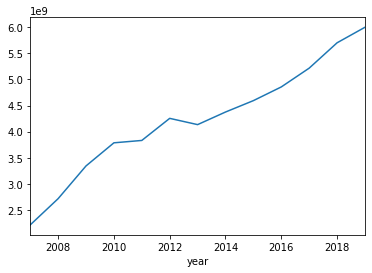

In [15]:
nfl_agg_df.groupby('year')['total_money'].sum().plot()


In [16]:
team_totals = nfl_agg_df.groupby(['year', 'team'], as_index=False)['total_money'].sum()

In [17]:
team_totals = team_totals.rename({'total_money': 'team_total'}, axis='columns')

In [18]:
team_totals.sample(5)

,year,team,team_total
135,2011,cleveland-browns,102501199.0
51,2008,minnesota-vikings,117223452.0
356,2018,carolina-panthers,189593364.0
304,2016,los-angeles-chargers,156063147.0
49,2008,los-angeles-rams,80666760.0


In [19]:
nfl_agg_df_w_total = pd.merge(left=nfl_agg_df, right=team_totals, on=['year', 'team'])

In [20]:
nfl_agg_df_w_total['perc_of_total'] = nfl_agg_df_w_total['total_money'] / nfl_agg_df_w_total['team_total']



In [21]:
# sample basis check these all total 1
nfl_agg_df_w_total.groupby(['year', 'team'])['perc_of_total'].sum()

year  team                
2007  arizona-cardinals       1.0
      atlanta-falcons         1.0
      baltimore-ravens        1.0
      buffalo-bills           1.0
      carolina-panthers       1.0
                             ... 
2019  san-francisco-49ers     1.0
      seattle-seahawks        1.0
      tampa-bay-buccaneers    1.0
      tennessee-titans        1.0
      washington-redskins     1.0
Name: perc_of_total, Length: 416, dtype: float64

In [36]:
nfl_agg_df_w_total = nfl_agg_df_w_total.astype({'year': 'object', 'team': 'object'})

In [46]:
# combine year and period to be new index
nfl_agg_df_w_total[['year', 'team']]

,year,team
0,2007,arizona-cardinals
1,2007,arizona-cardinals
2,2007,arizona-cardinals
3,2007,arizona-cardinals
4,2007,arizona-cardinals
...,...,...
2043,2019,washington-redskins
2044,2019,washington-redskins
2045,2019,washington-redskins
2046,2019,washington-redskins


In [53]:
# nfl_agg_df_w_total['yr_team'] = nfl_agg_df_w_total['year'].astype('str').str.cat(nfl_agg_df_w_total['team'] , sep='_')
nfl_agg_df_w_total = nfl_agg_df_w_total.set_index('yr_team').drop(['year', 'team'], axis='columns')

In [54]:
nfl_agg_df_w_total.sample(5)

,roster_type,total_money,team_total,perc_of_total
yr_team,,,,
2012_tennessee-titans,dead_cap,1712920.0,124842679.0,0.013721
2016_chicago-bears,dead_cap,12797351.0,149021220.0,0.085876
2011_philadelphia-eagles,dead_cap,6179232.0,131226464.0,0.047088
2011_houston-texans,specialty,2975000.0,129775569.0,0.022924
2012_minnesota-vikings,dead_cap,11121795.0,118179941.0,0.094109


In [58]:
features_df = nfl_agg_df_w_total.pivot(columns='roster_type', values='perc_of_total')

In [26]:
# nfl_agg_w_wins = pd.merge(left=nfl_agg_df_w_total, right=nfl_wl_df, on=['year', 'team'], how='inner')


In [67]:
nfl_wl_df.sample(5)

,year,team,w,l,playoff
16,2019,los-angeles-chargers,5,11,no
25,2019,philadelphia-eagles,9,7,yes
10,2019,detroit-lions,3,12,no
26,2019,pittsburgh-steelers,8,8,no
1,2019,atlanta-falcons,7,9,no


In [68]:
nfl_wl_df['year'].astype('str')

0     2019
1     2019
2     2019
3     2019
4     2019
5     2019
6     2019
7     2019
8     2019
9     2019
10    2019
11    2019
12    2019
13    2019
14    2019
15    2019
16    2019
17    2019
18    2019
19    2019
20    2019
21    2019
22    2019
23    2019
24    2019
25    2019
26    2019
27    2019
28    2019
29    2019
30    2019
31    2019
Name: year, dtype: object

In [69]:
nfl_wl_df['yr_team'] = nfl_wl_df['year'].astype('str').str.cat(nfl_wl_df['team'], sep='_')
nfl_wl_df = nfl_wl_df.set_index('yr_team').drop(['year', 'team'], axis='columns')
nfl_wl_df.sample(5)

,w,l,playoff
yr_team,,,
2019_los-angeles-chargers,5,11,no
2019_chicago-bears,8,8,no
2019_seattle-seahawks,11,5,yes
2019_kansas-city-chiefs,12,4,yes
2019_indianapolis-colts,7,9,no


In [74]:
# note this is for 2019 only
ftr_trgt_df = pd.merge(left=features_df, right=nfl_wl_df, left_index=True, right_index=True, sort=False)

In [76]:
ftr_trgt_df.shape

(32, 8)

In [77]:
ftr_trgt_df.sample(5)

,dead_cap,defense,injured,offense,specialty,w,l,playoff
yr_team,,,,,,,,
2019_chicago-bears,0.055910,0.430112,0.171630,0.326405,0.015942,8,8,no
2019_indianapolis-colts,0.124933,0.358492,0.148831,0.343824,0.023921,7,9,no
2019_tennessee-titans,0.069256,0.321994,0.155069,0.431958,0.021723,9,7,yes
2019_green-bay-packers,0.096446,0.282823,0.047492,0.541562,0.031677,13,3,yes
2019_cleveland-browns,0.157002,0.328422,0.083503,0.422010,0.009063,6,10,no


In [78]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
X = ftr_trgt_df[['dead_cap', 'injured', 'offense', 'specialty']]
y = ftr_trgt_df['w']
lr.fit(X=X, y=y) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [79]:
lr.coef_

array([ -6.10291833, -22.82937376,  -7.38556369,  76.36525368])

In [80]:
lr2 = LinearRegression()
X = ftr_trgt_df[['dead_cap', 'injured', 'offense']]
y = ftr_trgt_df['w']
lr2.fit(X=X, y=y) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [81]:

lr2.coef_

array([-10.78329407, -26.10952026, -12.69558762])

In [83]:
print(lr2.summary())

AttributeError: 'LinearRegression' object has no attribute 'summary'

In [84]:
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

OLS Regression Results                            
Dep. Variable:                      w   R-squared:                       0.379
Model:                            OLS   Adj. R-squared:                  0.312
Method:                 Least Squares   F-statistic:                     5.690
Date:                Fri, 24 Jan 2020   Prob (F-statistic):            0.00358
Time:                        20:57:30   Log-Likelihood:                -74.580
No. Observations:                  32   AIC:                             157.2
Df Residuals:                      28   BIC:                             163.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.1056      4.938      3.666      0.001       7.990      28.221
d

In [27]:
nfl_agg_w_wins.sample(5)


,year,team,roster_type,total_money,team_total,perc_of_total,w,l,playoff
157,2019,washington-redskins,specialty,6307857.0,172905188.0,0.036482,3,13,no
35,2019,cleveland-browns,defense,67523409.0,205599528.0,0.328422,6,10,no
133,2019,pittsburgh-steelers,dead_cap,34440398.0,205931939.0,0.167242,8,8,no
100,2019,new-england-patriots,defense,79266787.0,196624194.0,0.403139,12,4,yes
60,2019,houston-texans,defense,74565458.0,195086460.0,0.382217,10,6,yes


In [34]:
nfl_agg_w_wins.loc[nfl_agg_w_wins['roster_type'] == 'injured', ['w', 'perc_of_total']].corr()

,w,perc_of_total
w,1.00000,-0.56614
perc_of_total,-0.56614,1.00000


In [38]:
nfl_agg_w_wins.pivot(index='team', columns='roster_type', values=['perc_of_total','w'])

perc_of_total                                          \
roster_type               dead_cap   defense   injured   offense specialty   
team                                                                         
arizona-cardinals         0.264931  0.252093  0.118874  0.344876  0.019226   
atlanta-falcons           0.098395  0.281008  0.181473  0.431443  0.007681   
baltimore-ravens          0.162171  0.397840  0.107899  0.279156  0.052933   
buffalo-bills             0.096058  0.439945  0.025802  0.401639  0.036556   
carolina-panthers         0.078089  0.379779  0.287155  0.238546  0.016431   
chicago-bears             0.055910  0.430112  0.171630  0.326405  0.015942   
cincinnati-bengals        0.076621  0.269518  0.195384  0.427342  0.031134   
cleveland-browns          0.157002  0.328422  0.083503  0.422010  0.009063   
dallas-cowboys            0.055682  0.313469  0.122947  0.488202  0.019700   
denver-broncos            0.188213  0.343394  0.205554  0.231111  0.031728   
detroit-lions             0.088916  0.291200  0.382551  0.198940  0.038393   
green-bay-packers         0.096446  0.282823  0.047492  0.541562  0.031677   
houston-texans            0.141801  0.382217  0.127012  0.323563  0.025407   
indianapolis-colts        0.124933  0.358492  0.148831  0.343824  0.023921   
jacksonville-jaguars      0.188449  0.321608  0.169063  0.304254  0.016627   
kansas-city-chiefs        0.120512  0.296508  0.063979  0.486541  0.032461   
los-angeles-chargers      0.048807  0.383768  0.107572  0.451408  0.008445   
los-angeles-rams          0.073493  0.391517  0.027982  0.474414  0.032594   
miami-dolphins            0.383556  0.116635  0.264979  0.224461  0.010370   
minnesota-vikings         0.042162  0.469382  0.024593  0.445787  0.018077   
new-england-patriots      0.142105  0.403139  0.062095  0.383687  0.008974   
new-orleans-saints        0.114301  0.302274  0.071002  0.476500  0.035923   
new-york-giants           0.282509  0.237304  0.075552  0.395925  0.008710   
new-york-jets             0.145315  0.237479  0.341918  0.264900  0.010387   
oakland-raiders           0.138003  0.252175  0.167232  0.432996  0.009594   
philadelphia-eagles       0.123526  0.337115  0.180166  0.348169  0.011024   
pittsburgh-steelers       0.167242  0.352711  0.202674  0.246076  0.031297   
san-francisco-49ers       0.116865  0.347968  0.180158  0.329696  0.025314   
seattle-seahawks          0.145196  0.340223  0.138150  0.354662  0.021769   
tampa-bay-buccaneers      0.059334  0.340756  0.120429  0.459505  0.019975   
tennessee-titans          0.069256  0.321994  0.155069  0.431958  0.021723   
washington-redskins       0.076843  0.215290  0.466191  0.205195  0.036482   

                            w                                    
roster_type          dead_cap defense injured offense specialty  
team                                                             
arizona-cardinals         5.0     5.0     5.0     5.0       5.0  
atlanta-falcons           7.0     7.0     7.0     7.0       7.0  
baltimore-ravens         14.0    14.0    14.0    14.0      14.0  
buffalo-bills            10.0    10.0    10.0    10.0      10.0  
carolina-panthers         5.0     5.0     5.0     5.0       5.0  
chicago-bears             8.0     8.0     8.0     8.0       8.0  
cincinnati-bengals        2.0     2.0     2.0     2.0       2.0  
cleveland-browns          6.0     6.0     6.0     6.0       6.0  
dallas-cowboys            8.0     8.0     8.0     8.0       8.0  
denver-broncos            7.0     7.0     7.0     7.0       7.0  
detroit-lions             3.0     3.0     3.0     3.0       3.0  
green-bay-packers        13.0    13.0    13.0    13.0      13.0  
houston-texans           10.0    10.0    10.0    10.0      10.0  
indianapolis-colts        7.0     7.0     7.0     7.0       7.0  
jacksonville-jaguars      6.0     6.0     6.0     6.0       6.0  
kansas-city-chiefs       12.0    12.0    12.0    12.0      12.0  
los-angeles-chargers      5.0     5.